## EDA

In [1]:
import kagglehub
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

In [2]:
# Download latest version
data = kagglehub.dataset_download("russellchan/healthy-and-wilted-houseplant-images")

print("Path to dataset files:", data)

Using Colab cache for faster access to the 'healthy-and-wilted-houseplant-images' dataset.
Path to dataset files: /kaggle/input/healthy-and-wilted-houseplant-images


In [3]:
print("Files and folders inside dataset:")
print(os.listdir(data))

Files and folders inside dataset:
['houseplant_images']


In [4]:
main_dir = os.path.join(data, "houseplant_images")
print("Folders inside houseplant_images:")
print(os.listdir(main_dir))

Folders inside houseplant_images:
['healthy', 'wilted']


In [5]:
healthy_dir = os.path.join(main_dir, "healthy")
wilted_dir = os.path.join(main_dir, "wilted")

In [6]:
healthy_samples = random.sample(os.listdir(healthy_dir), 5)
wilted_samples = random.sample(os.listdir(wilted_dir), 5)

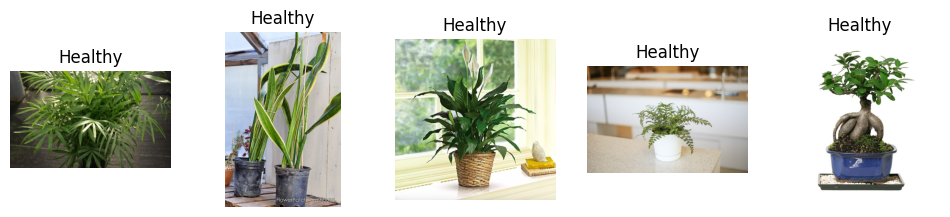

In [7]:
plt.figure(figsize=(12, 5))
for i, img_name in enumerate(healthy_samples):
    img_path = os.path.join(healthy_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Healthy")

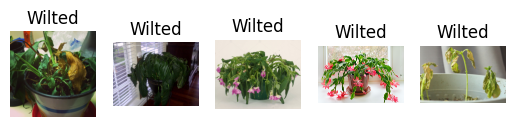

In [8]:
for i, img_name in enumerate(wilted_samples):
    img_path = os.path.join(wilted_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Wilted")

In [9]:
input_dir = os.path.join(data, "houseplant_images", "healthy")
output_dir = '/content/healthy_resized'
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(input_dir):
    f_img = os.path.join(input_dir, file)
    img = Image.open(f_img)
    rgb_im = img.convert("RGB").resize((256, 256))
    rgb_im.save(os.path.join(output_dir, file))

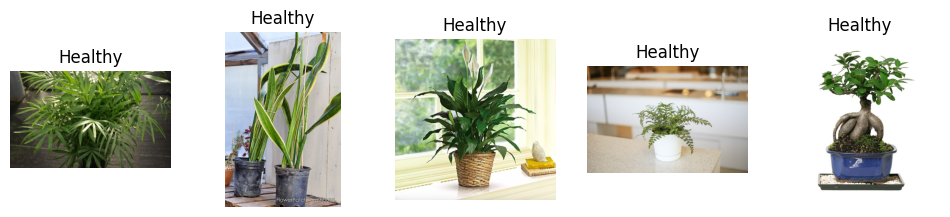

In [10]:
plt.figure(figsize=(12, 5))
for i, img_name in enumerate(healthy_samples):
    img_path = os.path.join(healthy_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Healthy")

In [11]:
f = os.path.join(data, "houseplant_images", "wilted")
output_dir = '/content/wilted_resized'
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(f):
    f_img = os.path.join(f, file)
    img = Image.open(f_img)
    rgb_im = img.convert("RGB").resize((256, 256))
    rgb_im.save(os.path.join(output_dir, file))

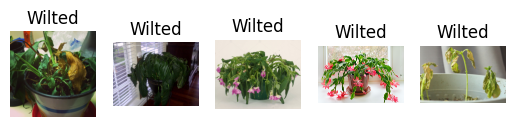

In [12]:
for i, img_name in enumerate(wilted_samples):
    img_path = os.path.join(wilted_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Wilted")

In [13]:
def find_duplicates(folder_path):
    hashes = defaultdict(list)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img_hash = imagehash.average_hash(img)
                hashes[str(img_hash)].append(filename)
        except:
            pass
    duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
    return duplicates

healthy_path = os.path.join(data, "houseplant_images", "healthy")
wilted_path  = os.path.join(data, "houseplant_images", "wilted")

healthy_dupes = find_duplicates(healthy_path)
wilted_dupes  = find_duplicates(wilted_path)

print("Healthy duplicates:", len(healthy_dupes))
print("Wilted duplicates:", len(wilted_dupes))

Healthy duplicates: 0
Wilted duplicates: 0


## There were duplicate images, but they were deleted and we rerun the cells :

In [14]:
# folder = os.path.join(data, "houseplant_images", "healthy")

# duplicate_groups = [
#     ['healthy_329.jpg', 'healthy_102.jpg'],
#     ['healthy_189.jpg', 'healthy_252.jpg', 'healthy_304.jpg'],
#     ['healthy_250.jpg', 'healthy_187.jpg'],
#     ['healthy_435.jpg', 'healthy_090.jpg'],
#     ['healthy_377.jpg', 'healthy_358.jpg'],
#     ['healthy_191.jpg', 'healthy_300.jpg'],
#     ['healthy_042.jpg', 'healthy_089.jpg'],
#     ['healthy_002.jpg', 'healthy_150.jpg'],
#     ['healthy_401.jpg', 'healthy_246.jpg'],
#     ['healthy_207.jpg', 'healthy_285.jpg'],
#     ['healthy_034.jpg', 'healthy_182.jpg'],
#     ['healthy_335.jpg', 'healthy_061.jpg'],
#     ['healthy_444.jpg', 'healthy_215.jpg'],
#     ['healthy_396.jpg', 'healthy_361.jpg'],
#     ['healthy_050.jpg', 'healthy_202.jpg'],
#     ['healthy_130.jpg', 'healthy_357.jpg'],
#     ['healthy_255.jpg', 'healthy_176.jpg'],
#     ['healthy_389.jpg', 'healthy_349.jpg'],
#     ['healthy_347.jpg', 'healthy_371.jpg'],
#     ['healthy_136.jpg', 'healthy_206.jpg'],
#     ['healthy_161.jpg', 'healthy_238.jpg'],
#     ['healthy_400.jpg', 'healthy_175.jpg'],
#     ['healthy_205.jpg', 'healthy_306.jpg'],
#     ['healthy_109.jpg', 'healthy_195.jpg'],
#     ['healthy_085.jpg', 'healthy_442.jpg'],
#     ['healthy_439.jpg', 'healthy_177.jpg'],
#     ['healthy_081.jpg', 'healthy_030.jpg'],
#     ['healthy_046.jpg', 'healthy_254.jpg'],
#     ['healthy_015.jpg', 'healthy_146.jpg'],
#     ['healthy_072.jpg', 'healthy_424.jpg']
# ]

# deleted = 0

# for group in duplicate_groups:
#     for file in group[1:]:
#         file_path = os.path.join(folder, file)
#         if os.path.exists(file_path):
#             os.remove(file_path)
#             deleted += 1

# print(f"Deleted {deleted} duplicate images from healthy folder.")

In [15]:
# folder = os.path.join(data, "houseplant_images", "wilted")

# duplicate_groups = [
#     ['wilted_085.jpg', 'wilted_389.jpg'],
#     ['wilted_051.jpg', 'wilted_444.jpg'],
#     ['wilted_182.jpg', 'wilted_222.jpg'],
#     ['wilted_310.jpg', 'wilted_001.jpg', 'wilted_418.jpg'],
#     ['wilted_352.jpg', 'wilted_111.jpg'],
#     ['wilted_285.jpg', 'wilted_086.jpg'],
#     ['wilted_326.jpg', 'wilted_013.jpg'],
#     ['wilted_421.jpg', 'wilted_148.jpg'],
#     ['wilted_404.jpg', 'wilted_011.jpg'],
#     ['wilted_269.jpg', 'wilted_270.jpg'],
#     ['wilted_055.jpg', 'wilted_184.jpg'],
#     ['wilted_380.jpg', 'wilted_201.jpg', 'wilted_345.jpg'],
#     ['wilted_304.jpg', 'wilted_373.jpg'],
#     ['wilted_405.jpg', 'wilted_246.jpg'],
#     ['wilted_047.jpg', 'wilted_308.jpg', 'wilted_441.jpg'],
#     ['wilted_118.jpg', 'wilted_173.jpg'],
#     ['wilted_054.jpg', 'wilted_357.jpg'],
#     ['wilted_406.jpg', 'wilted_008.jpg', 'wilted_327.jpg'],
#     ['wilted_369.jpg', 'wilted_414.jpg'],
#     ['wilted_401.jpg', 'wilted_431.jpg'],
#     ['wilted_302.jpg', 'wilted_009.jpg', 'wilted_038.jpg'],
#     ['wilted_221.jpg', 'wilted_024.jpg'],
#     ['wilted_119.jpg', 'wilted_172.jpg'],
#     ['wilted_156.jpg', 'wilted_303.jpg'],
#     ['wilted_079.jpg', 'wilted_135.jpg'],
#     ['wilted_107.jpg', 'wilted_183.jpg'],
#     ['wilted_159.jpg', 'wilted_354.jpg'],
#     ['wilted_248.jpg', 'wilted_063.jpg'],
#     ['wilted_143.jpg', 'wilted_353.jpg'],
#     ['wilted_036.jpg', 'wilted_076.jpg'],
#     ['wilted_316.jpg', 'wilted_390.jpg'],
#     ['wilted_072.jpg', 'wilted_037.jpg']
# ]

# deleted = 0

# for group in duplicate_groups:
#     for file in group[1:]:
#         file_path = os.path.join(folder, file)
#         if os.path.exists(file_path):
#             os.remove(file_path)
#             deleted += 1

# print(f"Deleted {deleted} duplicate images from wilted folder.")

In [16]:
healthy_path = os.path.join(data, "houseplant_images", "healthy")
wilted_path  = os.path.join(data, "houseplant_images", "wilted")

num_healthy = len([f for f in os.listdir(healthy_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
num_wilted  = len([f for f in os.listdir(wilted_path)  if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

total = num_healthy + num_wilted
total

904

## Modeling

In [17]:
main_dir     = os.path.join(data, "houseplant_images")
IMG_SIZE     = 256
BATCH_SIZE   = 64
VAL_SPLIT    = 0.2

In [20]:
train_ds1 = image_dataset_from_directory(
    main_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

val_ds1 = image_dataset_from_directory(
    main_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=99
)


Found 904 files belonging to 2 classes.
Found 904 files belonging to 2 classes.


In [21]:
train_labels = np.concatenate([y for x, y in train_ds1], axis=0)
val_labels = np.concatenate([y for x, y in val_ds1], axis=0)

print("Training distribution:", dict(zip(*np.unique(train_labels, return_counts=True))))
print("Validation distribution:", dict(zip(*np.unique(val_labels, return_counts=True))))

Training distribution: {np.float32(0.0): np.int64(452), np.float32(1.0): np.int64(452)}
Validation distribution: {np.float32(0.0): np.int64(452), np.float32(1.0): np.int64(452)}


In [22]:
train_ds = train_ds1.take(15)
val_ds = val_ds1.take(10)

In [23]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.05)
])

rescale = tf.keras.layers.Rescaling(1./255)

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

## Train model 1

In [26]:
model1 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(16, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(32, activation = "relu"),

    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])


model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["accuracy",tf.keras.metrics.AUC(name="auc",from_logits=False)]
)

history1=model1.fit(
    train_ds,
    callbacks=[early_stop, reduce_lr],
    validation_data=val_ds,
    epochs=30,
    verbose =1
)


model1.summary()
print(model1.summary())
print(model1.evaluate(val_ds))

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5252 - auc: 0.5311 - loss: 4.8025 - val_accuracy: 0.5859 - val_auc: 0.6200 - val_loss: 0.6873 - learning_rate: 0.0050
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6156 - auc: 0.6548 - loss: 0.6871 - val_accuracy: 0.5063 - val_auc: 0.6283 - val_loss: 0.8512 - learning_rate: 0.0050
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6202 - auc: 0.6695 - loss: 0.6870 - val_accuracy: 0.6672 - val_auc: 0.7111 - val_loss: 0.6719 - learning_rate: 0.0050
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6443 - auc: 0.6699 - loss: 0.6757 - val_accuracy: 0.5234 - val_auc: 0.7030 - val_loss: 0.6842 - learning_rate: 0.0050
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5738 - auc: 0.7146 - loss: 0.6625 - val_accuracy: 0.6500 - val_auc: 0.7142 - val_loss: 0.6512 - learning_rate: 0.0050
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6605 - auc: 0.7509 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,598,373 (48.06 MB)

 Trainable params: 4,199,457 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,398,916 (32.04 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,598,373 (48.06 MB)

 Trainable params: 4,199,457 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,398,916 (32.04 MB)

None
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7775 - auc: 0.8207 - loss: 0.5380
[0.5265815258026123, 0.768750011920929, 0.8272363543510437]


## Train model 2

In [27]:
model2 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(16, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same", activation ="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation = "relu"),

    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid")
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["accuracy",tf.keras.metrics.AUC(name="auc",from_logits=False)]
)

history2=model2.fit(
    train_ds,
    callbacks=[early_stop, reduce_lr],
    validation_data=val_ds,
    epochs=30,
    verbose =1
)


model2.summary()
print(model2.summary())
print(model2.evaluate(val_ds))

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5089 - auc: 0.5288 - loss: 4.0288 - val_accuracy: 0.5000 - val_auc: 0.7379 - val_loss: 0.6868 - learning_rate: 0.0050
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5510 - auc: 0.6472 - loss: 0.6873 - val_accuracy: 0.5234 - val_auc: 0.7739 - val_loss: 0.6630 - learning_rate: 0.0050
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5824 - auc: 0.7282 - loss: 0.6646 - val_accuracy: 0.5906 - val_auc: 0.7784 - val_loss: 0.6437 - learning_rate: 0.0050
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6592 - auc: 0.7428 - loss: 0.6471 - val_accuracy: 0.6297 - val_auc: 0.7719 - val_loss: 0.6274 - learning_rate: 0.0050
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6760 - auc: 0.7553 - loss: 0.6242 - val_accuracy: 0.6531 - val_auc: 0.7682 - val_loss: 0.6164 - learning_rate: 0.0050
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6725 - auc: 0.7485 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,654,053 (48.27 MB)

 Trainable params: 4,218,017 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,436,036 (32.18 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,654,053 (48.27 MB)

 Trainable params: 4,218,017 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,436,036 (32.18 MB)

None
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7120 - auc: 0.7602 - loss: 0.6029
[0.6035231351852417, 0.7109375, 0.7657275199890137]


## Train model 3

In [28]:
model3=models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),

    layers.Dropout(0.3),
    layers.Dense(1,activation="sigmoid")
])

model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["accuracy",tf.keras.metrics.AUC(name="auc",from_logits=False)]
)

history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print(model3.summary())
print(model3.evaluate(val_ds))

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step - accuracy: 0.5437 - auc: 0.5493 - loss: 9.5277 - val_accuracy: 0.5359 - val_auc: 0.7866 - val_loss: 0.6712 - learning_rate: 0.0050
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5530 - auc: 0.6124 - loss: 0.6744 - val_accuracy: 0.5141 - val_auc: 0.7847 - val_loss: 0.6866 - learning_rate: 0.0050
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.5911 - auc: 0.6753 - loss: 0.6666 - val_accuracy: 0.5094 - val_auc: 0.7864 - val_loss: 0.7365 - learning_rate: 0.0050
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.5559 - auc: 0.6363 - loss: 0.6889 - val_accuracy: 0.5641 - val_auc: 0.7867 - val_loss: 0.6486 - learning_rate: 0.0050
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.6767 - auc: 0.7484 - loss: 0.6146 - val_accuracy: 0.6750 - val_auc: 0.7800 - val_loss: 0.6402 - learning_rate: 0.0050
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.7082 - auc: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810,245 (48.87 MB)

 Trainable params: 4,270,081 (16.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,540,164 (32.58 MB)

None
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7479 - auc: 0.8085 - loss: 0.5424
[0.546126127243042, 0.7359374761581421, 0.8065917491912842]


In [29]:
print(model1.evaluate(val_ds))
print(model2.evaluate(val_ds))
print(model3.evaluate(val_ds))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7775 - auc: 0.8207 - loss: 0.5380
[0.5265815258026123, 0.768750011920929, 0.8272363543510437]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7120 - auc: 0.7602 - loss: 0.6029
[0.6035231351852417, 0.7109375, 0.7657275199890137]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7479 - auc: 0.8085 - loss: 0.5424
[0.546126127243042, 0.7359374761581421, 0.8065917491912842]


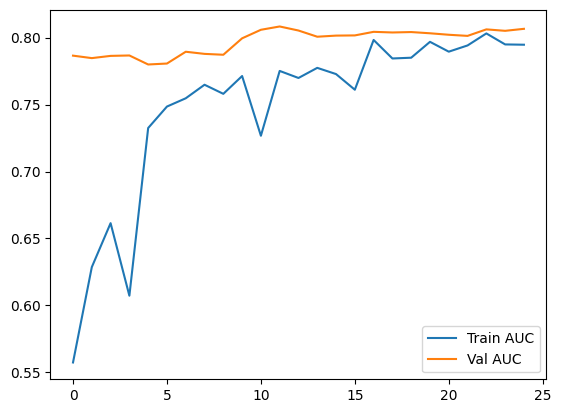

In [30]:
plt.plot(history3.history['auc'], label='Train AUC')
plt.plot(history3.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()

## Train model 4

In [31]:
model4=models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    rescale,
    data_augmentation,

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),

    layers.Dropout(0.3),
    layers.Dense(1,activation="sigmoid")
])

model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="binary_crossentropy",
    metrics=["accuracy",tf.keras.metrics.AUC(name="auc",from_logits=False)]
)

history4 = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print(model4.summary())
print(model4.evaluate(val_ds))

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.5109 - auc: 0.5014 - loss: 2.8449 - val_accuracy: 0.5000 - val_auc: 0.8011 - val_loss: 0.7015 - learning_rate: 0.0050
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.5411 - auc: 0.6167 - loss: 0.6873 - val_accuracy: 0.5063 - val_auc: 0.7651 - val_loss: 0.6755 - learning_rate: 0.0050
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5335 - auc: 0.6318 - loss: 0.6818 - val_accuracy: 0.6641 - val_auc: 0.7562 - val_loss: 0.6776 - learning_rate: 0.0050
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.5878 - auc: 0.6779 - loss: 0.6750 - val_accuracy: 0.6641 - val_auc: 0.7572 - val_loss: 0.6636 - learning_rate: 0.0050
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.6280 - auc: 0.7079 - loss: 0.6640 - val_accuracy: 0.7156 - val_auc: 0.7694 - val_loss: 0.6418 - learning_rate: 0.0050
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.6625 - auc: 0.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810,245 (48.87 MB)

 Trainable params: 4,270,081 (16.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,540,164 (32.58 MB)

None
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7138 - auc: 0.7886 - loss: 0.5840
[0.5838762521743774, 0.707812488079071, 0.7863183617591858]


## Train model 5

In [32]:
model5 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),


    layers.Dense(1, activation='sigmoid')
])


model5.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


history5 = model5.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc, test_auc = model5.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.6721 - auc: 0.7268 - loss: 0.6193 - val_accuracy: 0.5125 - val_auc: 0.7896 - val_loss: 0.6959 - learning_rate: 3.0000e-04
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.7413 - auc: 0.8152 - loss: 0.5414 - val_accuracy: 0.7000 - val_auc: 0.7914 - val_loss: 0.6890 - learning_rate: 3.0000e-04
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.7262 - auc: 0.8077 - loss: 0.5540 - val_accuracy: 0.7063 - val_auc: 0.7944 - val_loss: 0.6841 - learning_rate: 3.0000e-04
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.7511 - auc: 0.8241 - loss: 0.5319 - val_accuracy: 0.6141 - val_auc: 0.7971 - val_loss: 0.6831 - learning_rate: 3.0000e-04
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.7604 - auc: 0.8335 - loss: 0.5222 - val_accuracy: 0.5250 - val_auc: 0.7956 - val_loss: 0.6822 - learning_rate: 3.0000e-04
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accur

## Train model 6

In [33]:
model6 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.2),


    layers.Dense(1, activation='sigmoid')
])


model6.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


history6 = model6.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc, test_auc = model6.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.6181 - auc: 0.6591 - loss: 0.6837 - val_accuracy: 0.5016 - val_auc: 0.7901 - val_loss: 0.6937 - learning_rate: 3.0000e-04
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.7622 - auc: 0.8222 - loss: 0.5341 - val_accuracy: 0.5078 - val_auc: 0.7921 - val_loss: 0.6906 - learning_rate: 3.0000e-04
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.7617 - auc: 0.8226 - loss: 0.5348 - val_accuracy: 0.5063 - val_auc: 0.7902 - val_loss: 0.6886 - learning_rate: 3.0000e-04
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.7565 - auc: 0.8293 - loss: 0.5283 - val_accuracy: 0.5063 - val_auc: 0.7950 - val_loss: 0.6876 - learning_rate: 3.0000e-04
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.7649 - auc: 0.8346 - loss: 0.5184 - val_accuracy: 0.5016 - val_auc: 0.7961 - val_loss: 0.6882 - learning_rate: 3.0000e-04
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accura

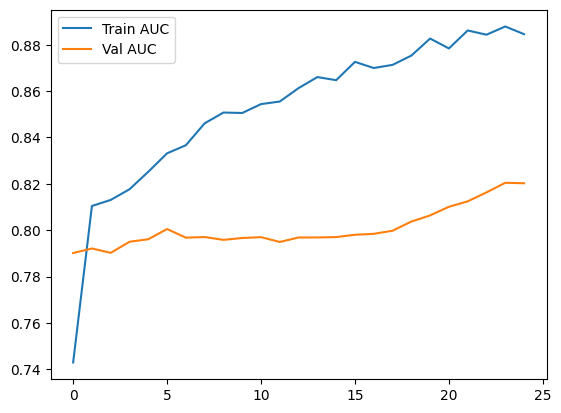

In [34]:
plt.plot(history6.history['auc'], label='Train AUC')
plt.plot(history6.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()

## Train model 7

In [35]:
model7 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.07),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.4),


    layers.Dense(1, activation='sigmoid')
])


model7.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


history7 = model7.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc, test_auc = model7.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.6813 - auc: 0.7542 - loss: 0.6112 - val_accuracy: 0.5063 - val_auc: 0.7862 - val_loss: 0.6918 - learning_rate: 3.0000e-04
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.7200 - auc: 0.8030 - loss: 0.5605 - val_accuracy: 0.6391 - val_auc: 0.7913 - val_loss: 0.6855 - learning_rate: 3.0000e-04
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.7468 - auc: 0.8139 - loss: 0.5426 - val_accuracy: 0.7266 - val_auc: 0.7920 - val_loss: 0.6852 - learning_rate: 3.0000e-04
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.7553 - auc: 0.8239 - loss: 0.5298 - val_accuracy: 0.6844 - val_auc: 0.7951 - val_loss: 0.6821 - learning_rate: 3.0000e-04
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.7506 - auc: 0.8188 - loss: 0.5377 - val_accuracy: 0.6594 - val_auc: 0.8009 - val_loss: 0.6790 - learning_rate: 3.0000e-04
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accura

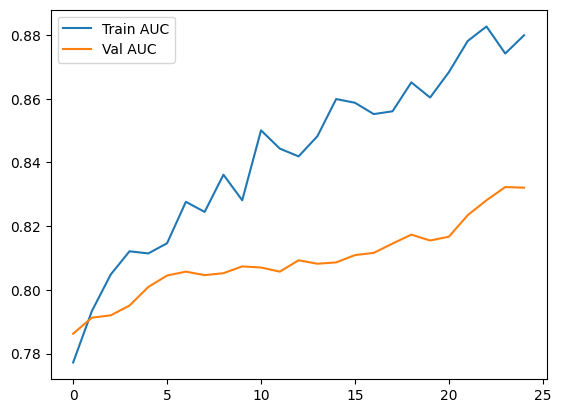

In [36]:
plt.plot(history7.history['auc'], label='Train AUC')
plt.plot(history7.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()

## Model 3 Vs Model 7

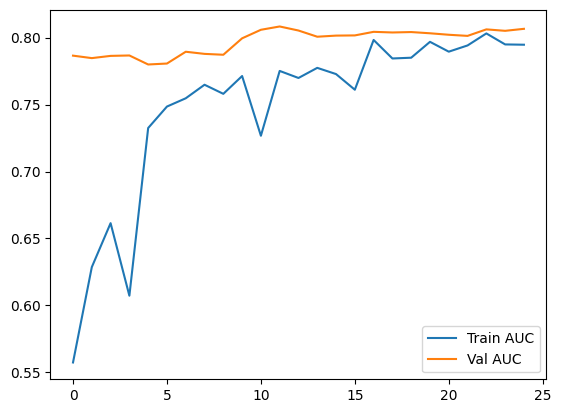

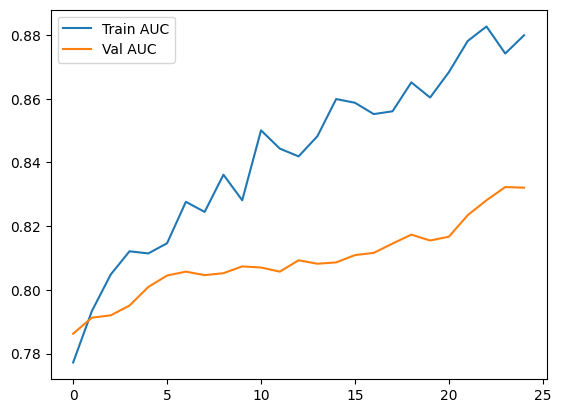

In [37]:
plt.plot(history3.history['auc'], label='Train AUC')
plt.plot(history3.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()
plt.plot(history7.history['auc'], label='Train AUC')
plt.plot(history7.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()

# Train final model

In [59]:
main_dir = os.path.join(data, "houseplant_images")
IMG_SIZE = 254
BATCH_SIZE = 16

full_dataset = tf.keras.utils.image_dataset_from_directory(
    main_dir,
    labels="inferred",
    label_mode="binary",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

Found 904 files belonging to 2 classes.


In [60]:
def get_data_partitions_tf(ds,
                           train_split=0.8,
                           val_split=0.1,
                           test_split=0.1,
                           shuffle=True,
                           shuffle_size=500):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds

In [61]:
train_ds, val_ds, test_ds = get_data_partitions_tf(full_dataset)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [62]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.cache().prefetch(AUTOTUNE)

print("✅ Data prepared successfully!")
print(f"Train batches: {len(train_ds)} | Val batches: {len(val_ds)} | Test batches: {len(test_ds)}")

✅ Data prepared successfully!
Train batches: 45 | Val batches: 5 | Test batches: 5


In [ ]:
# earlyStop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     restore_best_weights=True
# )

# reduceLr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=3,
#     min_lr=1e-6,
#     verbose=1
# )

In [44]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.07),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.4),


    layers.Dense(1, activation='sigmoid')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc, test_auc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 856ms/step - accuracy: 0.6362 - auc: 0.6971 - loss: 0.6633 - val_accuracy: 0.5469 - val_auc: 0.8442 - val_loss: 0.6953 - learning_rate: 1.0000e-04
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6946 - auc: 0.7671 - loss: 0.5915 - val_accuracy: 0.7969 - val_auc: 0.8651 - val_loss: 0.6865 - learning_rate: 1.0000e-04
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7004 - auc: 0.7713 - loss: 0.5916 - val_accuracy: 0.7812 - val_auc: 0.8636 - val_loss: 0.6815 - learning_rate: 1.0000e-04
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7270 - auc: 0.7852 - loss: 0.5729 - val_accuracy: 0.7344 - val_auc: 0.8641 - val_loss: 0.6754 - learning_rate: 1.0000e-04
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.7532 - auc: 0.7966 - loss: 0.5689 - val_accuracy: 0.7656 - val_auc: 0.8661 - val_loss: 0.6725 - learning_rate: 1.0000e-04
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accur

In [53]:
Final_model4 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.07),
    layers.RandomBrightness(factor=0.1),
    layers.RandomContrast(factor=0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),


    layers.Dense(1, activation='sigmoid')
])


Final_model4.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0004),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


Final_history4 = Final_model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc, test_auc = Final_model4.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 428ms/step - accuracy: 0.6967 - auc: 0.7350 - loss: 0.6344 - val_accuracy: 0.8125 - val_auc: 0.8517 - val_loss: 0.6787 - learning_rate: 4.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6823 - auc: 0.7537 - loss: 0.6106 - val_accuracy: 0.5500 - val_auc: 0.8385 - val_loss: 0.6828 - learning_rate: 4.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7115 - auc: 0.7764 - loss: 0.5984 - val_accuracy: 0.5375 - val_auc: 0.8589 - val_loss: 0.6674 - learning_rate: 4.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6971 - auc: 0.7640 - loss: 0.5981 - val_accuracy: 0.7375 - val_auc: 0.8350 - val_loss: 0.6542 - learning_rate: 4.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.7585 - auc: 0.8144 - loss: 0.5435 - val_accuracy: 0.7000 - val_auc: 0.8234 - val_loss: 0.6313 - learning_rate: 4.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 

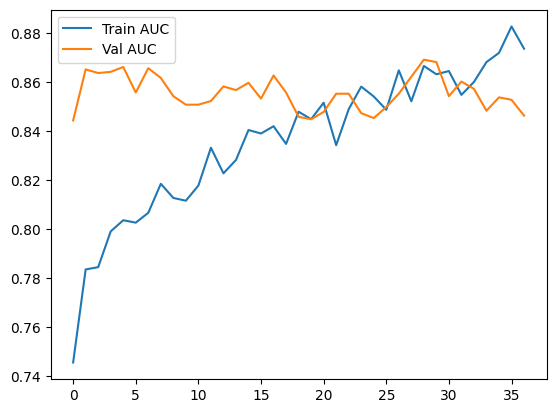

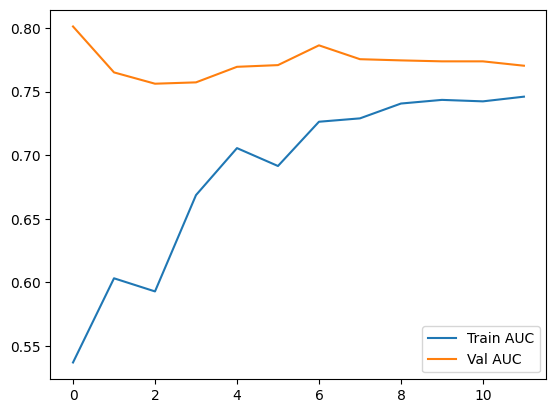

In [63]:
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()
plt.plot(history4.history['auc'], label='Train AUC')
plt.plot(history4.history['val_auc'], label='Val AUC')
plt.legend()
plt.show()

In [58]:
FinalModel = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.07),
    layers.RandomBrightness(factor=0.1),
    layers.RandomContrast(factor=0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),


    layers.Dense(1, activation='sigmoid')
])


FinalModel.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0004),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


FinalHistory = FinalModel.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test_loss, test_acc, test_auc = FinalModel.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.7355 - auc: 0.7546 - loss: 0.6280 - val_accuracy: 0.4881 - val_auc: 0.7510 - val_loss: 0.7152 - learning_rate: 4.0000e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7173 - auc: 0.7876 - loss: 0.5823 - val_accuracy: 0.6905 - val_auc: 0.7544 - val_loss: 0.6397 - learning_rate: 4.0000e-04
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7286 - auc: 0.7867 - loss: 0.5910 - val_accuracy: 0.6310 - val_auc: 0.7408 - val_loss: 0.6853 - learning_rate: 4.0000e-04
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7480 - auc: 0.8071 - loss: 0.5616 - val_accuracy: 0.6667 - val_auc: 0.7150 - val_loss: 0.6233 - learning_rate: 4.0000e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.7657 - auc: 0.8223 - loss: 0.5347 - val_accuracy: 0.6786 - val_auc: 0.7760 - val_loss: 0.6313 - learning_rate: 4.0000e-04
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 